In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

'input your module name here'
__author__ = 'Leoch'

%matplotlib inline

import gc
import os
import pickle as pkl
import random as rd

import cv2
import h5py as h5
import keras
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

from jupyterthemes import jtplot
jtplot.style(theme = 'grade3', grid=False)

Using TensorFlow backend.


In [2]:
from keras.models import load_model
model = load_model('../different_networks/model/inception/weights.165-0.099-0.9920.hdf5')

In [4]:
import image_processing as ip

In [17]:
imlist = []
filelist = []
for file in os.listdir('./未命名文件夹/'):
    if file[-3:] in ['jpg', 'peg']:
        filepath = os.path.join('./未命名文件夹/', file)
        print(filepath)
        im1 = cv2.imread(filepath)
        im1 = ip.image_resize(im1, (299,299))
        im1 = ip.image_enhance(im1, 'LAC')
        im1 = im1 / 255
        imlist.append(im1)
        print('done')
        filelist.append(file)
imlist = np.array(imlist)

./未命名文件夹/1561344070911.jpg
done
./未命名文件夹/1561344404399.jpg
done
./未命名文件夹/1561344570638.jpg
done
./未命名文件夹/amd_late_dry.jpg
done
./未命名文件夹/amd_late_wet.jpg
done
./未命名文件夹/cataract.jpg
done
./未命名文件夹/DR.jpg
done
./未命名文件夹/glaucoma.jpg
done
./未命名文件夹/glaucoma的副本.jpg
done
./未命名文件夹/high_myopia.jpg
done


In [43]:
imlist2 = []

for file in os.listdir('./未命名文件夹/'):
    if file[-3:] in ['jpg', 'peg']:
        filepath = os.path.join('./未命名文件夹/', file)
        print(filepath)
        im1 = cv2.imread(filepath)
        im1 = ip.image_resize(im1, (299,299))
        imlist2.append(im1)
        print('done')

./未命名文件夹/1561344070911.jpg
done
./未命名文件夹/1561344404399.jpg
done
./未命名文件夹/1561344570638.jpg
done
./未命名文件夹/amd_late_dry.jpg
done
./未命名文件夹/amd_late_wet.jpg
done
./未命名文件夹/cataract.jpg
done
./未命名文件夹/DR.jpg
done
./未命名文件夹/glaucoma.jpg
done
./未命名文件夹/glaucoma的副本.jpg
done
./未命名文件夹/high_myopia.jpg
done


In [18]:
result = model.predict(imlist)
format()

In [34]:
for i in zip(result, filelist):
    print('{:.5f}'.format(i[0][0]), '{:.5f}'.format(i[0][1]), i[1])

0.99985 0.00015 1561344070911.jpg
0.00000 1.00000 1561344404399.jpg
0.99996 0.00004 1561344570638.jpg
0.00000 1.00000 amd_late_dry.jpg
0.99999 0.00001 amd_late_wet.jpg
0.00000 1.00000 cataract.jpg
1.00000 0.00000 DR.jpg
0.00000 1.00000 glaucoma.jpg
0.99720 0.00280 glaucoma的副本.jpg
0.99909 0.00091 high_myopia.jpg


In [39]:
new_model = keras.models.Model(inputs = model.input,outputs=model.get_layer('mixed10').output)

In [40]:
w1 = np.array(model.layers[-2].get_weights())[0]
b1 = np.array(model.layers[-2].get_weights())[1]

w2 = np.array(model.layers[-1].get_weights())[0]
b2 = np.array(model.layers[-1].get_weights())[1]

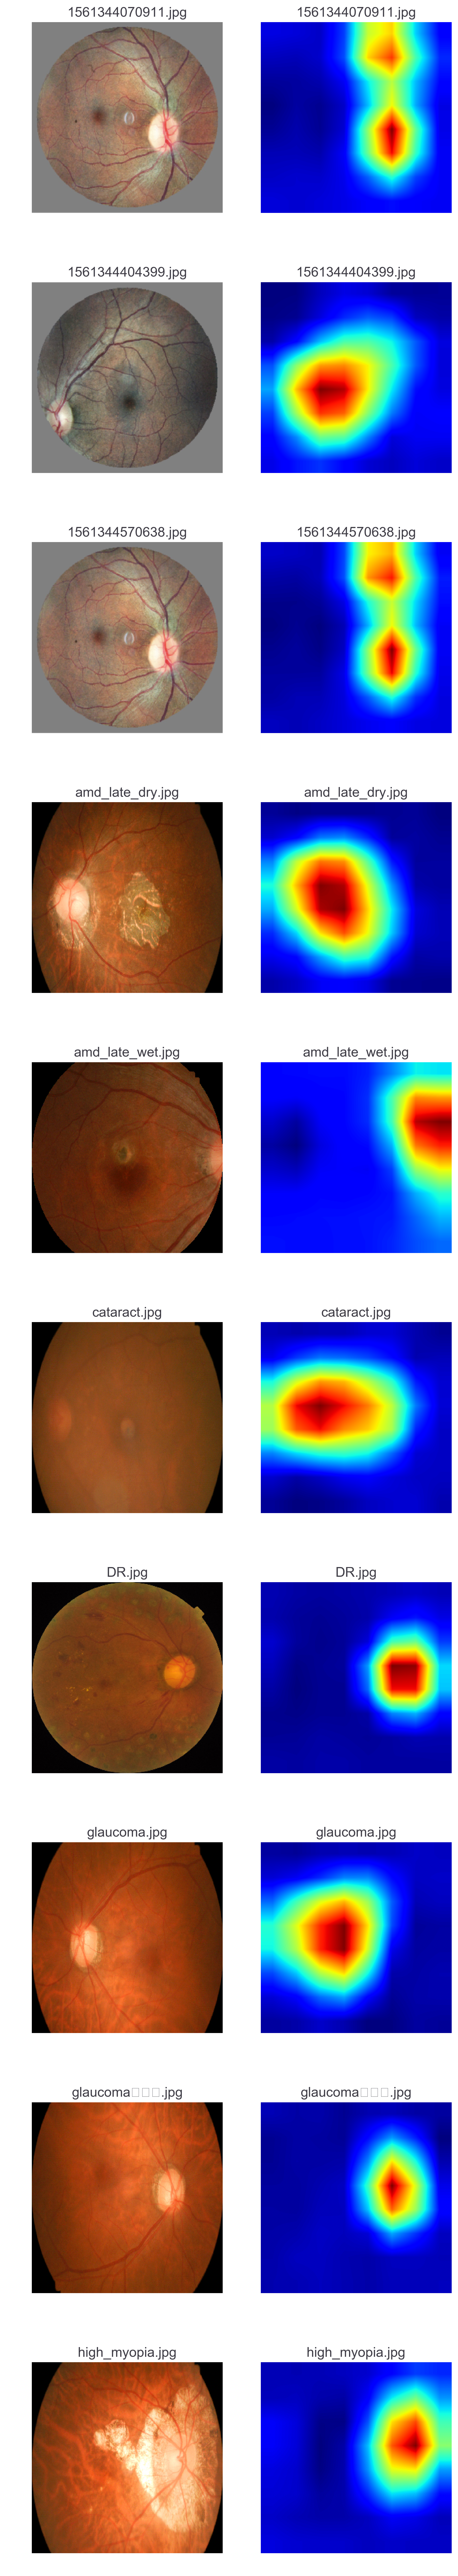

In [49]:
x = new_model.predict(imlist)
fig = plt.figure(figsize= (8, 50), dpi = 300)
for index, i in enumerate(x):
    y1 = np.dot(i,w1) + b1
    y2 = np.dot(y1,w2) + b2
    y2 = np.squeeze(y2)
    ax1 = fig.add_subplot(10,2,2 * index + 1)
    ax2 = fig.add_subplot(10,2, 2 * index + 2)
    ax1.imshow(imlist2[index][:,:,::-1])
    if result[index][0] > result[index][1]:
        ax2.imshow(y2[:,:,0],cmap = 'jet',interpolation = 'bilinear')
    else:
        ax2.imshow(y2[:,:,1],cmap = 'jet',interpolation = 'bilinear')
    ax1.set_title(filelist[index])
    ax2.set_title(filelist[index])
    ax1.axis('off')
    ax2.axis('off')

In [50]:
fig.savefig('./vis.eps')